# Melanoma Detection Assignment

## Problem statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

---

## Importing Skin Cancer Data

In [111]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import Augmentor
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from collections import Counter

In [17]:
# Defining image and batch size
img_height, img_width, batch_size = 180, 180, 32

# Location of training images (downloaded on local machine)
training_images_path = "C:\\Users\\anshu\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train"

# Loading images, resizing them and creating training and validation datasets
train_ds, val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        training_images_path,
        seed=123,
        validation_split=0.2,
        subset='both',
        image_size=(img_height, img_width),
        batch_size=batch_size)

class_names = train_ds.class_names

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Using 447 files for validation.


---

## Visualizing Data (Sample Image from each class)

In [32]:
class_names = train_ds.class_names
def display_sample_images(train_ds):
    fig, axes = plt.subplots(1, len(class_names), figsize=(24, 4))

    for i, class_name in enumerate(class_names):
        for images, labels in train_ds:
            idx = np.where(labels.numpy() == i)[0][0]
            sample_image = images[idx]
            break
        axes[i].imshow(sample_image.numpy().astype("uint8"))
        axes[i].set_title(class_name)
        axes[i].axis("off")
    
    plt.tight_layout()
    plt.show()

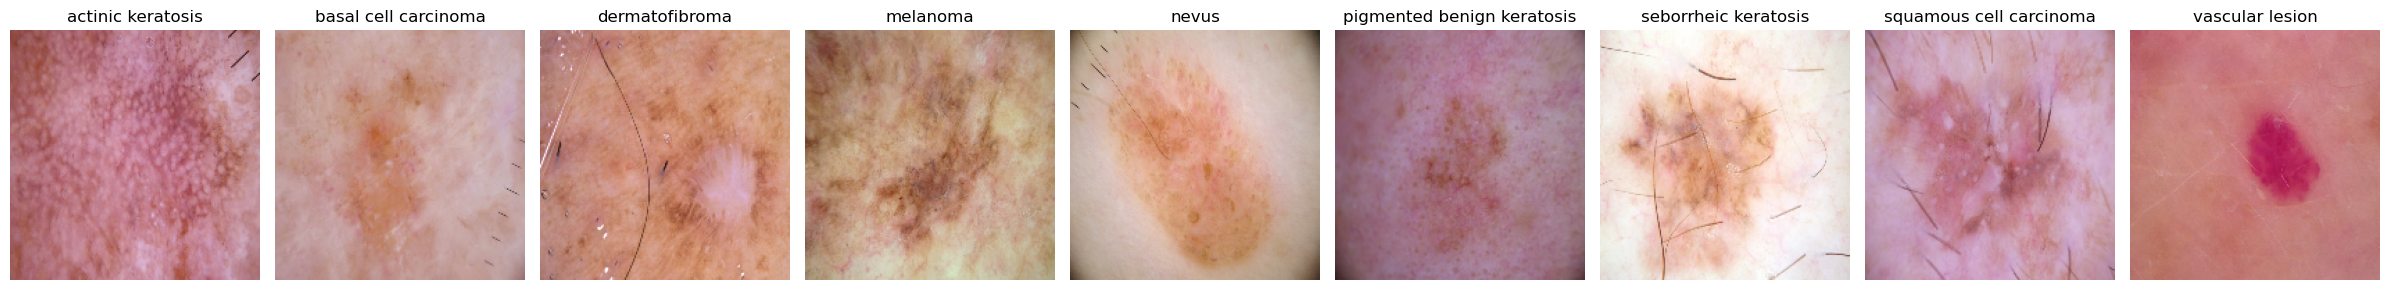

In [34]:
display_sample_images(train_ds)

---

## Building and Training Model 1

#### Normalizing pixel value between (0,1)

In [45]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

#### Building and Compiling Model

In [49]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(180, 180, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names),activation='softmax')
])

C:\Users\anshu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [62]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 178, 178, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 89, 89, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 87, 87, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    60,588,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,658,729 (231.39 MB)

 Trainable params: 60,658,729 (231.39 MB)

 Non-trainable params: 0 (0.00 B)

#### Training Model

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [57]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.1830 - loss: 3.0467 - val_accuracy: 0.2215 - val_loss: 2.0126
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.2546 - loss: 1.9364 - val_accuracy: 0.3087 - val_loss: 1.8555
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.3462 - loss: 1.7750 - val_accuracy: 0.3870 - val_loss: 1.6999
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.3868 - loss: 1.6941 - val_accuracy: 0.4989 - val_loss: 1.5273
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.4374 - loss: 1.5805 - val_accuracy: 0.5011 - val_loss: 1.4395
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.4667 - loss: 1.4980 - val_accuracy: 0.4899 - val_loss: 1.4903
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.5192 - loss: 1.4264 - val_accuracy: 0.5123 - val_loss: 1.4435
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.5203 - loss: 1.3728 - val_accuracy: 0.4966 - val_lo

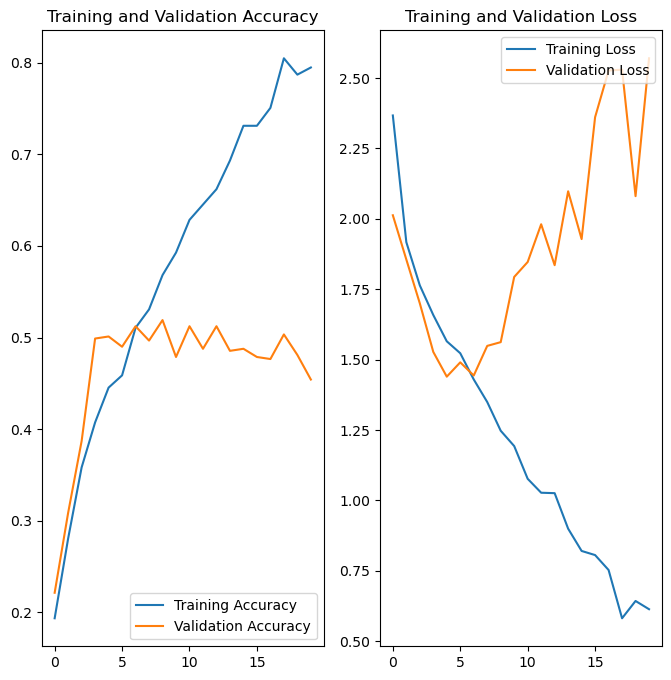

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Accuracy and Loss Analysis

Looking at the accuracy and loss graphs shown above of training and validation data we can see that

- **Model is clearly overfitting as training accuracy is significatly more than validation accuracy**.
- Validation accuracy is plateauing after about 5 epochs

---

## Building and Training Model 2

#### Data Augmentation

In [74]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(180,180,3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)
])

C:\Users\anshu\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Building and Compiling Model

In [80]:
model_1 = Sequential([
    data_augmentation,
    Conv2D(32, (3, 3), padding='same', input_shape=(180, 180, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names),activation='softmax')
])

In [84]:
model_1.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [86]:
# View the summary of all layers
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 178, 178, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 89, 89, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 87, 87, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    60,588,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,658,729 (231.39 MB)

 Trainable params: 60,658,729 (231.39 MB)

 Non-trainable params: 0 (0.00 B)

#### Training Model

In [42]:
%%time
epochs = 20
history_1 = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.1870 - loss: 3.6167 - val_accuracy: 0.2349 - val_loss: 2.0386
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.2117 - loss: 2.0129 - val_accuracy: 0.3400 - val_loss: 2.0388
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.2429 - loss: 1.9423 - val_accuracy: 0.3557 - val_loss: 1.9912
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.3236 - loss: 1.8602 - val_accuracy: 0.3893 - val_loss: 1.7247
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.3723 - loss: 1.7528 - val_accuracy: 0.3758 - val_loss: 1.7324
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.4023 - loss: 1.6946 - val_accuracy: 0.3982 - val_loss: 1.6925
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.4120 - loss: 1.6653 - val_accuracy: 0.4295 - val_loss: 1.6000
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.4001 - loss: 1.6138 - val_accuracy: 0.4251 - val_los

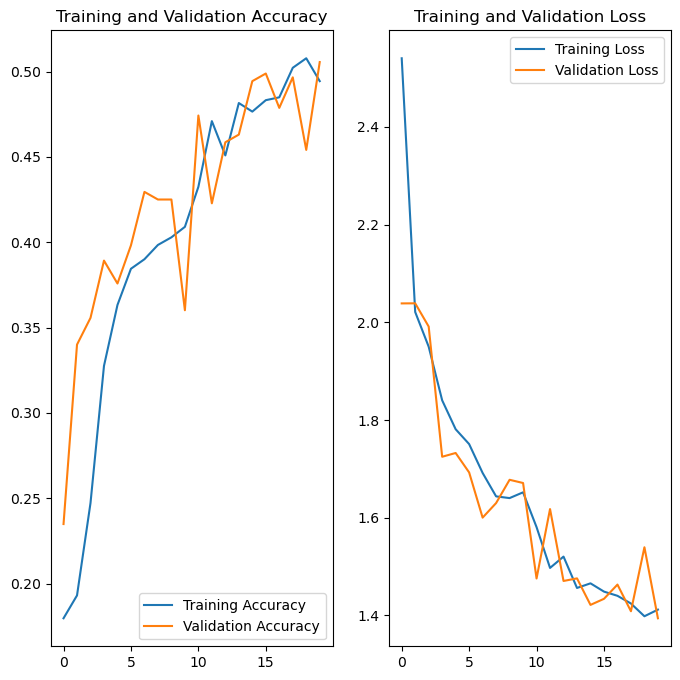

In [44]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Accuracy and Loss Analysis

Looking at the accuracy and loss graphs shown above of training and validation data we can see that

- **Model is clearly underfitting as both training and validation accuracy is around 50% even after training the model for 20 epochs**.

---

## Analysing Class Distribution

In [104]:
label_counts = Counter()
for _, labels in train_ds:  # Iterate through batches
    label_counts.update(labels.numpy())

# Print the count of images for each label
for idx, class_name in enumerate(class_names):
    print(f"{class_name}: {label_counts[idx]} images")

actinic keratosis: 92 images
basal cell carcinoma: 309 images
dermatofibroma: 77 images
melanoma: 352 images
nevus: 277 images
pigmented benign keratosis: 370 images
seborrheic keratosis: 58 images
squamous cell carcinoma: 142 images
vascular lesion: 115 images


Looking the class distribution above we can see that there is a lot of class imbalance.
- pigmented benign keratosis class has the maximum number of images.
- seborrheic keratosis has minimum number of images.

This level of imbalance can impact the accuracy of model. We'll augment training data in the next section leveraging the Augmentor library to resolve this imbalance.

---

## Building and Training Model 3

#### Augmenting Training Data using Augmentor Library

In [124]:
def augment_dataset(augmented_dataset_path):
    class_dirs = os.listdir(training_images_path)
    
    for class_dir in class_dirs:
        class_path = os.path.join(training_images_path, class_dir)
        augmented_class_path = os.path.join(augmented_dataset_path, class_dir)
    
        # Ensuring the augmented class directory exists
        os.makedirs(augmented_class_path, exist_ok=True)
    
        # Create an Augmentor pipeline for the class
        p = Augmentor.Pipeline(class_path, output_directory=augmented_class_path)
        p.flip_left_right(probability=0.5)
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.zoom_random(probability=0.5, percentage_area=0.8)
        p.sample(300)  # Generating 400 samples per class
    
    print("Augmentation completed!")

In [126]:
augmented_dataset_path = "C:\\Users\\anshu\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Augmented"
augment_dataset(augmented_dataset_path)

Initialised with 114 image(s) found.
Output directory set to C:\Users\anshu\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Augmented\actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E920F360D0>: 100%|██████████| 300/300 [00:06<00:00, 43.38 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to C:\Users\anshu\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Augmented\basal cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E921B7FD10>: 100%|██████████| 300/300 [00:06<00:00, 44.29 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to C:\Users\anshu\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Augmented\dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E921B59E50>: 100%|██████████| 300/300 [00:07<00:00, 40.99 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:\Users\anshu\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Augmented\melanoma.

Processing <PIL.Image.Image image mode=RGB size=960x724 at 0x1E920FCBA90>: 100%|██████████| 300/300 [00:39<00:00,  7.62 Samples/s]                    


Initialised with 357 image(s) found.
Output directory set to C:\Users\anshu\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Augmented\nevus.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E921C38DD0>: 100%|██████████| 300/300 [00:33<00:00,  9.05 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to C:\Users\anshu\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Augmented\pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E921B6D610>: 100%|██████████| 300/300 [00:06<00:00, 44.96 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to C:\Users\anshu\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Augmented\seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1E920F9C8D0>: 100%|██████████| 300/300 [00:16<00:00, 18.62 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:\Users\anshu\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Augmented\squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E921B7B590>: 100%|██████████| 300/300 [00:06<00:00, 45.06 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:\Users\anshu\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Augmented\vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E90E566910>: 100%|██████████| 300/300 [00:06<00:00, 43.90 Samples/s]                  

Augmentation completed!


#### Loading and Normalizing Augmented Training Data

In [129]:
# Loading images, resizing them and creating training and validation datasets
aug_train_ds, aug_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        augmented_dataset_path,
        seed=123,
        validation_split=0.2,
        subset='both',
        image_size=(img_height, img_width),
        batch_size=batch_size)

Found 2700 files belonging to 9 classes.
Using 2160 files for training.
Using 540 files for validation.


In [131]:
aug_train_ds = aug_train_ds.map(lambda x, y: (normalization_layer(x), y))
aug_val_ds = aug_val_ds.map(lambda x, y: (normalization_layer(x), y))

#### Building and Compiling Model

In [134]:
model_2 = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(180, 180, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names),activation='softmax')
])

In [136]:
model_2.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [138]:
# View the summary of all layers
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 178, 178, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 89, 89, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 87, 87, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    60,588,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,658,729 (231.39 MB)

 Trainable params: 60,658,729 (231.39 MB)

 Non-trainable params: 0 (0.00 B)

#### Training Model

In [141]:
%%time
epochs = 30
history_2 = model_2.fit(
  aug_train_ds,
  validation_data=aug_val_ds,
  epochs=epochs,
)

Epoch 1/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.1261 - loss: 3.3524 - val_accuracy: 0.2278 - val_loss: 2.1386
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.2395 - loss: 2.0404 - val_accuracy: 0.2352 - val_loss: 1.9200
Epoch 3/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.2733 - loss: 1.8452 - val_accuracy: 0.2778 - val_loss: 2.0394
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.2984 - loss: 1.8125 - val_accuracy: 0.2333 - val_loss: 1.9145
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.2714 - loss: 1.8938 - val_accuracy: 0.3556 - val_loss: 1.6572
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.3512 - loss: 1.6251 - val_accuracy: 0.3519 - val_loss: 1.6376
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.3566 - loss: 1.5880 - val_accuracy: 0.3926 - val_loss: 1.6026
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.3957 - loss: 1.5028 - val_accuracy: 0.4370 - v

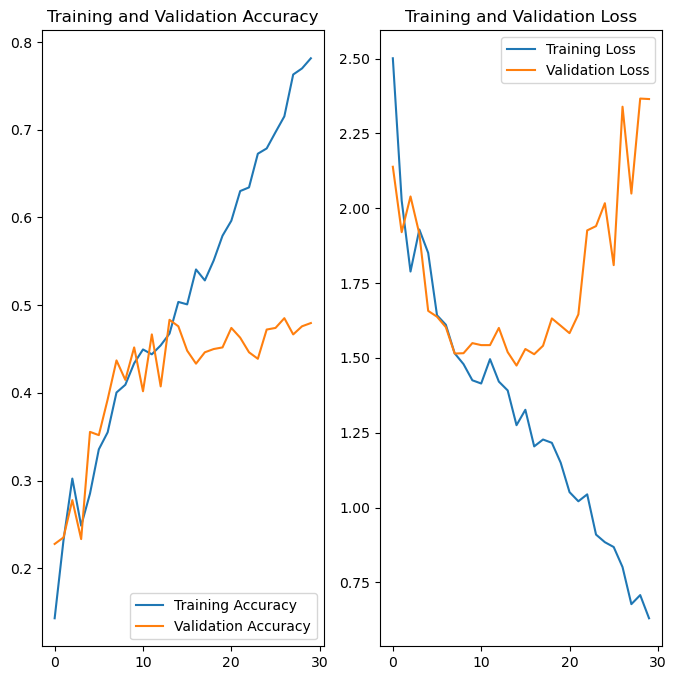

In [144]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Accuracy and Loss Analysis

Looking at the accuracy and loss graphs shown above of training and validation data we can see that

- **Model is clearly overfitting as training accuracy is significatly more than validation accuracy**.
- Validation accuracy is plateauing after about 10 epochs.